# Regressão Linear

In [42]:
import pandas as pd
import numpy
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import style
plt.style.use('ggplot')
%matplotlib inline

## Exemplo 1: Dados de imóveis de Boston

In [80]:
from sklearn.datasets import load_boston
boston = load_boston()

In [2]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [3]:
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [4]:
boston_data = pd.DataFrame(data=boston.data, columns=boston.feature_names)
boston_data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [15]:
# pq os preços estao separados

In [5]:
boston_data['PRICE']=boston.target

In [6]:
boston_data.tail()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0
505,0.04741,0.0,11.93,0.0,0.573,6.030,80.8,2.5050,1.0,273.0,21.0,396.90,7.88,11.9


In [11]:
correlacao = boston_data.corr()
correlacao

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


In [13]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [14]:
modelo = LinearRegression()

In [15]:
y = boston_data['PRICE']

In [16]:
X = boston_data.drop('PRICE',axis=1)

In [61]:
X_treino, X_teste, y_treino, y_teste = train_test_split(X,y, test_size=0.1) # separação dos dados

In [62]:
modelo.fit(X_treino,y_treino)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [63]:
modelo.coef_

array([-1.16656991e-01,  4.83317057e-02,  1.03011930e-02,  2.88307782e+00,
       -1.93270498e+01,  3.43084479e+00,  7.42100624e-04, -1.59688119e+00,
        3.22265209e-01, -1.22947991e-02, -9.10437043e-01,  1.04395377e-02,
       -5.55448058e-01])

In [64]:
coef = pd.DataFrame(data=modelo.coef_,index=X.columns,columns=['Coef'])

In [65]:
coef.index.name='Propriedade'

In [67]:
coef.transpose()

Propriedade,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
Coef,-0.116657,0.048332,0.010301,2.883078,-19.32705,3.430845,0.000742,-1.596881,0.322265,-0.012295,-0.910437,0.01044,-0.555448


In [68]:
coef['Coef']['RM']

3.4308447850943473

In [69]:
modelo.intercept_

39.223776564419175

In [31]:
coef.append(pd.DataFrame(data=[modelo.intercept_],index=['Intercept'],columns=['Coef']))

,Coef
CRIM,-0.045314
ZN,0.046326
INDUS,0.052627
CHAS,1.717458
NOX,-16.522561
RM,4.306950
AGE,0.001816
DIS,-1.341448
RAD,0.239406
TAX,-0.012024


In [70]:
y_pred = modelo.predict(X_teste)
y_pred

array([36.4842101 , 27.30289524, 15.09337429, 20.66338737, 30.39440553,
        1.51331592,  9.00868696, 29.07947187, 19.47065341, 36.57886619,
       25.73654528, 17.89125595, 23.54539198, 20.22358352,  3.41890804,
       23.49525074, 20.01064965, 32.638514  , 34.4535035 , 17.23039603,
       36.69937993, 34.77609741, 17.4279538 , 16.27227927, 24.78664485,
       19.64824211, 20.65976415, 22.44626683, 21.50339928, 26.07073093,
        8.02259796, 10.63748268, 28.37128469, 20.98643948, 16.64583849,
       22.62520657,  8.70274138, 30.50131159, 38.98555518, 21.02440956,
       14.34180131, 25.70546864, 18.17214401, 14.49454724,  8.00543345,
       25.32431194, 19.93667459, 14.10617402, 42.46015464, 20.56842929,
       10.78994335])

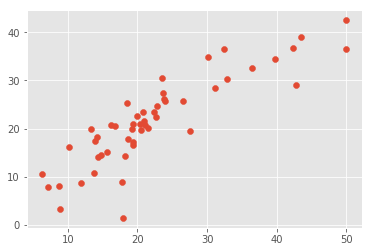

In [71]:
plt.scatter(x=y_teste,y=y_pred)

Gráfico dos resíduos

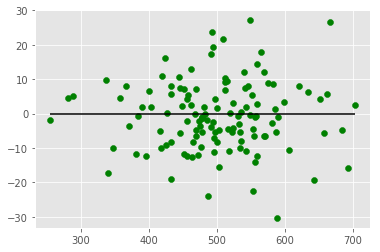

In [135]:
plt.scatter(x=y_pred, y= (y_pred - y_teste),c='green')
plt.hlines(y=0,xmin=y_pred.min(),xmax=y_pred.max())

## Exemplo 2: Dados de uma empresa de e-commerce

In [86]:
ecom = pd.read_csv('Ecommerce Customers.csv')

In [87]:
ecom.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [88]:
ecom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
Email                   500 non-null object
Address                 500 non-null object
Avatar                  500 non-null object
Avg. Session Length     500 non-null float64
Time on App             500 non-null float64
Time on Website         500 non-null float64
Length of Membership    500 non-null float64
Yearly Amount Spent     500 non-null float64
dtypes: float64(5), object(3)
memory usage: 25.4+ KB


In [100]:
ecom2 = ecom.loc[:,'Avg. Session Length':'Yearly Amount Spent']

In [102]:
ecom2.head()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,34.497268,12.655651,39.577668,4.082621,587.951054
1,31.926272,11.109461,37.268959,2.664034,392.204933
2,33.000915,11.330278,37.110597,4.104543,487.547505
3,34.305557,13.717514,36.721283,3.120179,581.852344
4,33.330673,12.795189,37.536653,4.446308,599.406092


In [103]:
ecom2.corr()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
Avg. Session Length,1.000000,-0.027826,-0.034987,0.060247,0.355088
Time on App,-0.027826,1.000000,0.082388,0.029143,0.499328
Time on Website,-0.034987,0.082388,1.000000,-0.047582,-0.002641
Length of Membership,0.060247,0.029143,-0.047582,1.000000,0.809084
Yearly Amount Spent,0.355088,0.499328,-0.002641,0.809084,1.000000


In [116]:
X = ecom2.drop('Yearly Amount Spent', axis=1)
y = ecom2['Yearly Amount Spent']
X_treino, X_teste, y_treino, y_teste =  train_test_split(X,y)
modelo = LinearRegression()
modelo.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [114]:
modelo.coef_

array([25.73427108, 38.70915381,  0.43673884, 61.57732375])

In [115]:
modelo.intercept_

-1051.594255300622

In [121]:
coef_reg = np.append(modelo.coef_,modelo.intercept_)
index = np.append(X.columns,'Intercept')
coef = pd.DataFrame(data=coef_reg,index=index,columns=['Coeficientes'])
coef.transpose()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Intercept
Coeficientes,25.734271,38.709154,0.436739,61.577324,-1051.594255


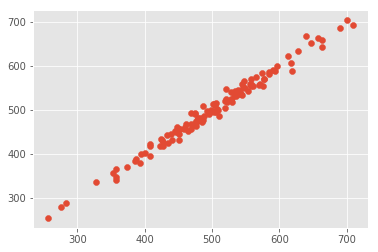

In [127]:
y_pred = modelo.predict(X_teste)
plt.scatter(x=y_teste,y=y_pred)

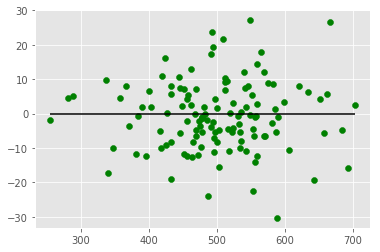

In [133]:
plt.scatter(x=y_pred, y= (y_pred - y_teste),c='green')
plt.hlines(y=0,xmin=y_pred.min(),xmax=y_pred.max())

__Exercício 1__: Carregue o csv `imoveis_Rio_de_Janeiro.csv` com a função `pd.read_csv()`.  

__Exercício 2__: Faça um *scatter* plot de cada coluna com a coluna entre condomínio, quartos, `pm2` (preço por metro quadrado) (Dá pra fazer isso com um `for`?).

__Exercício 3__: Faça uma regressão linear de `pm2` nas variáveis determinadas pela correlação. Guarde os coeficientes e o *interceptor* num dataframe. Faça um *sccater* plot do y_teste pelo y_pred. Faça também o gráfico dos resíduos.

__Exercício 4__: Refaça a regressão para o E-commerce somente para a coluna de maior correlação. Faça um *scatter* plot dessa coluna pelo valor gasto e plote junto a reta da regressão. Faça também o gráfico dos resíduos.

## $R^2$ score

É um teste que fornece uma taxa que diz o quão próximo estarão os valores preditos em relação aos valores reais. Seus valores estão ente 0 e 1:
 - `0.0`: indica que o modelo não consegue explicar a variância da variável dependente em função das variáveis independentes; e
 - `1.0`: indique que o modelo consegue explicar a variância da variável dependente em função das variáveis independentes.
 
Ou seja, quanto mais próximo de um for o $R^2$-score .

Porém, o teste $R^2$-score não consegue dizer se os coeficientes e as predições estão enviesados. Para corrigir esse problema, pode-se usar o gráfico dos resíduos. O $R^2$-socre também não consegue dizer se a regressão é adequada; pode-se ter um baixo valor do $R^2$-score para uma regressão que é adequada e um alto valor do $R^2$-score para um modelo que não se adequa aos dados.

In [128]:
from sklearn.metrics import r2_score
r2 = r2_score(y_teste,y_pred)
r2

0.9854446842037123

Podemos também determinar o erro médio quadrático da predição:

__Exercício 5__: Calculo o $R^2$-score da regreção para dataframe `imoveis_Rio_de_Janeiro`.

## Análise mais apronfudada com Statsmodels

In [137]:
import statsmodels.api as sm
#X_inter = sm.add_constant(X) # adiciona uma coluna constante igual a 1 na matriz X,
# de modo que o termo constante da regressão é retornado.
modelo = sm.OLS(y,X).fit()

In [139]:
modelo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     Yearly Amount Spent   R-squared:                       0.998
Model:                             OLS   Adj. R-squared:                  0.998
Method:                  Least Squares   F-statistic:                 6.146e+04
Date:                 Wed, 30 Jan 2019   Prob (F-statistic):               0.00
Time:                         16:36:32   Log-Likelihood:                -2270.3
No. Observations:                  500   AIC:                             4549.
Df Residuals:                      496   BIC:                             4565.
Df Model:                            4                                         
Covariance Type:             nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Avg. Session Length     11.8713      0.763     15.564      0.000      10.373      13.370
Time on App             34.7461      1.011     34.375      0.000      32.760      36.732
Time on Website        -14.1642      0.705    -20.091      0.000     -15.549     -12.779
Length of Membership    60.4162      1.022     59.102      0.000      58.408      62.425
==============================================================================
Omnibus:                        0.497   Durbin-Watson:                   2.160
Prob(Omnibus):                  0.780   Jarque-Bera (JB):                0.605
Skew:                          -0.008   Prob(JB):                        0.739
Kurtosis:                       2.830   Cond. No.                         54.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [76]:
print(sumario.extra_txt)

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.51e+04. This might indicate that there are
strong multicollinearity or other numerical problems.


## Gráfico dos resíduos

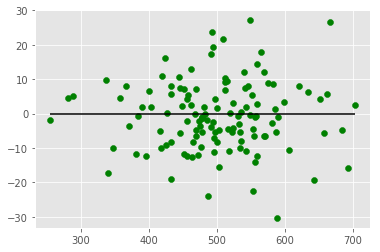

In [132]:
plt.scatter(x=y_pred, y= (y_pred - y_teste),c='green')
plt.hlines(y=0,xmin=y_pred.min(),xmax=y_pred.max())

## Acurácia

In [129]:
from sklearn import metrics
print("MAE = ",metrics.mean_absolute_error(y_pred,y_teste))
print("MSE = ",metrics.mean_squared_error(y_pred,y_teste))
print("RMSE = ",np.sqrt(metrics.mean_squared_error(y_pred,y_teste)))
print("RMSE = ",np.sqrt(metrics.mean_squared_log_error(y_pred,y_teste)))

MAE =  7.869358825356422
MSE =  101.67021315912136
RMSE =  10.083164838438444
RMSE =  0.020205554716033646


__Exercício 6__: Crie um dataframe com os cálculos dos erros acima para a regressão do Rio de Janeiro.